In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold


from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score, confusion_matrix

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [4]:
# Load the datasets
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

print(train_df.columns.tolist())
print(test_df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
#get data volume in both training and test dataset
print("Number of rows in train_df:", len(train_df))
print("Number of rows in test_df:", len(test_df))

Number of rows in train_df: 891
Number of rows in test_df: 418


In [6]:
#try find data types 

train_df_datatype = train_df.dtypes

print("Data types of columns:")
print("******************** Train ***************************")
print(train_df_datatype)
print("******************** Test ***************************")

test_df_datatype = test_df.dtypes
print(test_df_datatype)




Data types of columns:
******************** Train ***************************
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
******************** Test ***************************
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
print(len(train_df.columns))
print(len(test_df.columns))


# Compare data types of columns by column names
comparison = pd.DataFrame({
    'File1_DataType': train_df_datatype,
    'File2_DataType': test_df_datatype
}).dropna(how='all')  # Retain only columns present in at least one file

print("Data type comparison:")
print(comparison)

12
11
Data type comparison:
            File1_DataType File2_DataType
Age                float64        float64
Cabin               object         object
Embarked            object         object
Fare               float64        float64
Name                object         object
Parch                int64          int64
PassengerId          int64          int64
Pclass               int64          int64
Sex                 object         object
SibSp                int64          int64
Survived             int64            NaN
Ticket              object         object


# Check for NaN values in training data set

In [8]:
print(train_df.isnull().any())

print(train_df.isnull().sum())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

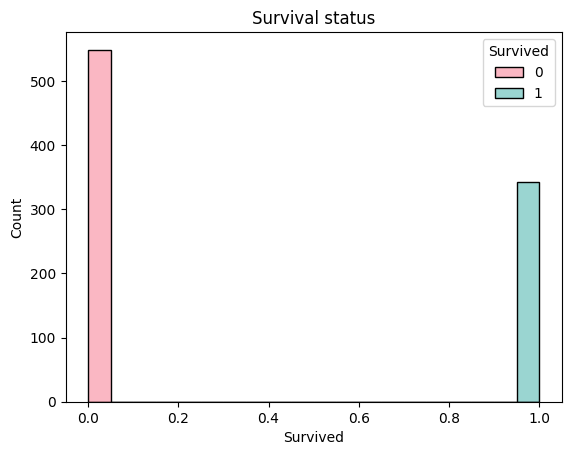

--------------------------------------------


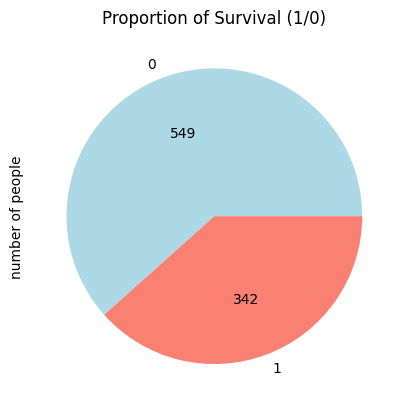

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [9]:
#assuming data sanity is done, lets plot the data graph
#since we r predicting who survived - lets use below features to plot data - 
# 

sns.histplot(data=train_df, x='Survived', hue='Survived', kde=True, palette='husl', bins=20)
plt.title('Survival status')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

print('--------------------------------------------')

#pie chart
count = train_df['Survived'].value_counts()
count.plot.pie(autopct=lambda p: f"{int(p * sum(count) / 100)}", colors=['lightblue', 'salmon'])
plt.title('Proportion of Survival (1/0)')
plt.ylabel('number of people')  # Remove y-label for aesthetics
plt.show()


print(train_df.columns.tolist())
print(test_df.columns.tolist())
#drop columns which are not needed
train_df = train_df.drop(columns=['Cabin','Embarked'])
test_df = test_df.drop(columns=['Cabin','Embarked'])

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].mean())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

# Encoding categorical data

In [10]:
# Combine train and test datasets for consistent encoding
combined_df = pd.concat([train_df.drop(columns=['Survived']), test_df], axis=0, ignore_index=True)

# Retain numerical columns for concatenation after encoding
numerical_columns = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch']
numerical_data = combined_df[numerical_columns]

# Handle missing values
# Fill missing numerical values with the mean
combined_df[numerical_columns] = combined_df[numerical_columns].fillna(combined_df[numerical_columns].mean())

# Fill missing categorical values with the mode
combined_df['Sex'] = combined_df['Sex'].fillna(combined_df['Sex'].mode()[0])
#if 'Embarked' in combined_df.columns:
 #   combined_df['Embarked'] = combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0])

combined_df['Age'] = combined_df['Age'].fillna(combined_df['Age'].mean())

#df['Age'] = df['Age'].fillna(df['Age'].mean())

# Label Encoding for 'Sex'
le_sex = LabelEncoder()
combined_df['Sex'] = le_sex.fit_transform(combined_df['Sex'])

# One-Hot Encoding for 'Embarked'
#one_hot_embarked = pd.get_dummies(combined_df['Embarked'], prefix='Embarked', drop_first=True)

# Drop original 'Embarked' column and concatenate one-hot encoded columns
#combined_df = pd.concat([combined_df.drop(columns=['Embarked']), one_hot_embarked], axis=1)

# 'Name' and 'Ticket' could require special handling if needed (e.g., length, prefix extraction, etc.)
combined_df['Name_Length'] = combined_df['Name'].apply(len)  # Example feature extraction
combined_df = combined_df.drop(columns=['Name', 'Ticket'])  # Drop these columns after processing

# Drop numerical columns from combined_df before concatenation
combined_df = combined_df.drop(columns=numerical_columns)

# Concatenate numerical data back with the processed dataframe
combined_df = pd.concat([numerical_data, combined_df], axis=1)

# Split back into train and test datasets
train_df_encoded = combined_df.iloc[:len(train_df)]
train_df_encoded['Survived'] = train_df['Survived']
test_df_encoded = combined_df.iloc[len(train_df):]



# Separate features and target variable in training data
X = train_df_encoded.drop(columns=['Survived'])
y = train_df_encoded['Survived']

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


print('Check null for X_train ::::::::::::')
print(X_train.isnull().any())

print('Check null for X_val ::::::::::::')
print(X_val.isnull().any())

print('Check null for y_train ::::::::::::')
print(y_train.isnull().any())

print('Check null for y_val ::::::::::::')
print(y_val.isnull().any())


print('Check null for test_df_encoded ::::::::::::')
print(test_df_encoded.isnull().any())

# Apply Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on validation set
y_val_pred = logreg.predict(X_val)

# Evaluate the model
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Predict on test dataset
test_predictions = logreg.predict(test_df_encoded)

# Outputs
print("Encoded Train DataFrame:")
print(train_df_encoded.head())
print("\nEncoded Test DataFrame:")
print(test_df_encoded.head())
print("\nTraining Features:")
print(X_train.head())
print("\nValidation Features:")
print(X_val.head())
print("\nTest Predictions:")
print(test_predictions)

# Confusion Matrix (optional)
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:\n", conf_matrix)

Check null for X_train ::::::::::::
PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Sex            False
Fare           False
Name_Length    False
dtype: bool
Check null for X_val ::::::::::::
PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Sex            False
Fare           False
Name_Length    False
dtype: bool
Check null for y_train ::::::::::::
False
Check null for y_val ::::::::::::
False
Check null for test_df_encoded ::::::::::::
PassengerId    False
Pclass         False
Age            False
SibSp          False
Parch          False
Sex            False
Fare           False
Name_Length    False
dtype: bool
Validation Accuracy: 0.8156424581005587

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                        

/tmp/ipykernel_24/2603420421.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_encoded['Survived'] = train_df['Survived']


In [11]:
# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)


# Make predictions on validation data
val_predictions = xgb_classifier.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_val, val_predictions)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_val, val_predictions)
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_val, val_predictions)
print("F1 Score:", f1)

# Confusion Matrix (optional)
conf_matrix = confusion_matrix(y_val, val_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Make predictions on test data
test_predictions = xgb_classifier.predict(test_df_encoded)


Validation Accuracy: 0.8100558659217877
Precision: 0.8333333333333334
Recall: 0.6756756756756757
F1 Score: 0.746268656716418
Confusion Matrix:
 [[95 10]
 [24 50]]


In [16]:
# Creating a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_val, y_pred))


accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_val, val_predictions)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_val, val_predictions)
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_val, val_predictions)
print("F1 Score:", f1)

# Confusion Matrix (optional)
conf_matrix = confusion_matrix(y_val, val_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Make predictions on test data
test_predictions = rf_classifier.predict(test_df_encoded)


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Validation Accuracy: 0.8100558659217877
Precision: 0.8333333333333334
Recall: 0.6756756756756757
F1 Score: 0.746268656716418
Confusion Matrix:
 [[95 10]
 [24 50]]


In [18]:
# Creating a GradientBoostingClassifier instance
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fitting the model to the training data
gb_classifier.fit(X_train, y_train)

# Making predictions on the validation set
y_pred = gb_classifier.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)



# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_val, y_pred))


accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_val, val_predictions)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_val, val_predictions)
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_val, val_predictions)
print("F1 Score:", f1)

# Confusion Matrix (optional)
conf_matrix = confusion_matrix(y_val, val_predictions)
print("Confusion Matrix:\n", conf_matrix)


# Make predictions on test data
test_predictions = gb_classifier.predict(test_df_encoded)

Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179

Validation Accuracy: 0.8100558659217877
Precision: 0.8333333333333334
Recall: 0.6756756756756757
F1 Score: 0.746268656716418
Confusion Matrix:
 [[95 10]
 [24 50]]


In [ ]:

# Prepare the output DataFrame
output_df = test_df[['PassengerId']].copy()
output_df['Survived'] = test_predictions
# Save the output to a CSV file
output_df.to_csv('submission.csv', index=False)